In [2]:
# Задание
# Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
# Извлеките все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий
# Постройте график наиболее востребованных навыков для аналитика данных
# https://github.com/hhru/api

In [122]:
# информация интернета
# https://edwvb.blogspot.com/2018/02/kak-ya-skachivayu-parsit-vakansii-kompanij-s-hh-ru-na-primere-gazproma.html
# https://office-menu.ru/python/96-api-hh

In [1]:
# Библиотека для работы с HTTP-запросами. Ее необходимо использовать для обращения к API HH
import requests
# Пакет для работы с данными в формате json
import json
# Индикаторы прогресса, визуальное отображение процесса работы 
from tqdm.auto import tqdm
# DefaultDict — словарь с дефолтным значением для любого нового ключа
from collections import defaultdict
# Модуль pickle реализует мощный алгоритм сериализации и десериализации объектов Python.
# "Pickling" - процесс преобразования объекта Python в поток байтов. 
import pickle
# Библиотека для анализа данных
import pandas as pd
pd.options.display.max_rows = 10
import regex as re

In [3]:
sber = '3529'# это номер работодателя 
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [4]:
res = requests.get(url)
res

<Response [200]>

In [5]:
# res.json()

In [6]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

12

In [7]:
v = vacancies.get('items')

In [8]:
# v[0].get('')

In [9]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [10]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [11]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [12]:
vnum  = vacancies.get('pages')
vnum

12

In [13]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)    

  0%|          | 0/12 [00:00<?, ?it/s]

In [14]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

1104

In [15]:
# all_vacancy_ids

In [16]:
url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[2]}'

In [17]:
res = requests.get(url)

In [18]:
res.json().get('key_skills')

[{'name': 'Многозадачность'},
 {'name': 'Проведение опросов'},
 {'name': 'Google Chrome'},
 {'name': 'Организация тренинга для новых сотрудников'},
 {'name': 'Разработка тестов, опросников'},
 {'name': 'onboarding'}]

In [19]:
vak_url = 'https://api.hh.ru/vacancies/{}'
var = []
for i in all_vacancy_ids:
    var.append(requests.get(vak_url.format(i)).json())

In [141]:
# Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
df = pd.DataFrame(var)
df

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages,immediate_redirect_url
0,55415805,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по работе с клиентами,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55415805,[],[],[],False,[],NaN
1,55415496,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Клиентский менеджер прямых продаж,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55415496,[],[],[],False,[],NaN
2,66978838,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Специалист по адаптации (onboarding manager),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/66978838,[],[],[],False,[],NaN
3,67157362,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Копирайтер в Управление исследований и инноваций,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/67157362,[],[],[],False,[],NaN
4,53361761,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Клиентский менеджер малого и микробизнеса,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 93900, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53361761,[],[],[],False,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,66519567,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Эксперт сопровождения Hadoop,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/66519567,[],[],[],False,[],NaN
1100,66640733,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Senior разработчик ПО на Golang (SberInfra),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/66640733,[],[],[],False,[],NaN
1101,67399016,True,"{'id': 'premium', 'name': 'Премиум'}",[],Менеджер по работе с ключевыми клиентами малог...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 119300, 'to': None, 'currency': 'RUR'...","{'id': 'direct', 'name': 'Рекламная'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/67399016,[],[],[],False,[],https://hh.ru/vacancy/45790891
1102,67399519,True,"{'id': 'premium', 'name': 'Премиум'}",[],Старший менеджер по привлечению корпоративных ...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 146400, 'to': None, 'currency': 'RUR'...","{'id': 'direct', 'name': 'Рекламная'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/67399519,[],[],[],False,[],https://hh.ru/vacancy/45381514


In [24]:
df.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'immediate_redirect_url'],
      dtype='object')

In [142]:
df['description'] = df['description'].apply(lambda x: (re.sub(r'<.*?>', '', str(x))))

In [143]:
# Извлеките все описания этих вакансий
df['description']

0       Сбер — лучший работодатель России. У нас более...
1       Сбер — лучший работодатель России. У нас более...
2       Команда Цифровые поверхности Салют (SberDevice...
3       Управление исследований и инноваций координиру...
4       Клиентский менеджер малого и микробизнеса – ва...
                              ...                        
1099    SberData - департамент по управлению данными в...
1100    Обязанности: Разработка высоконагруженного отк...
1101    Сбер — лучший работодатель России. У нас более...
1102    Сбер — лучший работодатель России. У нас более...
1103    О проекте: Команда SberLinux OS DevTeam формир...
Name: description, Length: 1104, dtype: object

In [144]:
df['key_skills'] = df['key_skills'].apply(lambda x: (re.sub('[^А-Яа-я, ]', '', str(x))))

In [145]:
df['experience'] = df['experience'].apply(lambda x: (re.sub('[^А-Яа-я0-9 ]', '', str(x))))

In [146]:
df['specializations'] = df['specializations'].apply(lambda x: (re.sub('[^А-Яа-я ]', '', str(x))))

In [147]:
df['professional_roles'] = df['professional_roles'].apply(lambda x: (re.sub('[^А-Яа-я ]', '', str(x))))

In [149]:
df['schedule'] = df['schedule'].apply(lambda x: (re.sub('[^А-Яа-я ]', '', str(x))))

In [150]:
df['employment'] = df['employment'].apply(lambda x: (re.sub('[^А-Яа-я ]', '', str(x))))

In [151]:
df['department'] = df['department'].apply(lambda x: (re.sub('[^А-Яа-я ]', '', str(x))))

In [152]:
# Переведите даты публикаций в datetime
df['initial_created_at'] = pd.to_datetime(df.initial_created_at)

In [166]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
df1 = df[['id', 'name', 'experience', 'schedule',
       'employment', 'department', 'description',
       'key_skills', 'specializations', 'professional_roles', 'published_at', 'created_at',
       'initial_created_at']]
df1

,id,name,experience,schedule,employment,department,description,key_skills,specializations,professional_roles,published_at,created_at,initial_created_at
0,55415805,Менеджер по работе с клиентами,Нет опыта,Полный день,Полная занятость,Сбер Начало карьеры,Сбер — лучший работодатель России. У нас более...,,Прямые продажи Продажи Оптовая торгов...,Менеджер по продажам менеджер по работе с к...,2022-06-29T13:44:54+0300,2022-06-29T13:44:54+0300,2022-05-16 10:05:41+03:00
1,55415496,Клиентский менеджер прямых продаж,Нет опыта,Полный день,Полная занятость,Сбер Начало карьеры,Сбер — лучший работодатель России. У нас более...,,Прямые продажи Продажи Оптовая торгов...,Руководитель отдела клиентского обслуживания,2022-06-29T19:44:36+0300,2022-06-29T19:44:36+0300,2022-05-16 10:00:46+03:00
2,66978838,Специалист по адаптации (onboarding manager),13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,Команда Цифровые поверхности Салют (SberDevice...,"Многозадачность, Проведение опросов, , Ор...",Рекрутмент Управление персоналом тренинг...,Менеджер по персоналу,2022-06-20T09:55:10+0300,2022-06-20T09:55:10+0300,2022-06-20 09:55:10+03:00
3,67157362,Копирайтер в Управление исследований и инноваций,36 От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,Управление исследований и инноваций координиру...,,Контент Информационные технологии интерн...,Копирайтер редактор корректор,2022-06-24T12:22:12+0300,2022-06-24T12:22:12+0300,2022-06-24 12:22:12+03:00
4,53361761,Клиентский менеджер малого и микробизнеса,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Клиентский менеджер малого и микробизнеса – ва...,"Активные продажи, Проведение презентаций, П...",Прямые продажи Продажи Оптовая торгов...,Руководитель отдела клиентского обслуживания,2022-06-27T12:47:08+0300,2022-06-27T12:47:08+0300,2022-03-04 10:23:27+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,66519567,Эксперт сопровождения Hadoop,36 От 3 до 6 лет,Полный день,Полная занятость,Сбер,SberData - департамент по управлению данными в...,,Программирование Разработка Информационн...,Специалист по информационной безопасности,2022-06-26T17:34:26+0300,2022-06-26T17:34:26+0300,2022-06-01 16:17:05+03:00
1100,66640733,Senior разработчик ПО на Golang (SberInfra),36 От 3 до 6 лет,Полный день,Полная занятость,Сбер,Обязанности: Разработка высоконагруженного отк...,,Программирование Разработка Информационн...,Программист разработчик,2022-07-04T09:21:34+0300,2022-07-04T09:21:34+0300,2022-06-06 18:32:24+03:00
1101,67399016,Менеджер по работе с ключевыми клиентами малог...,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбер — лучший работодатель России. У нас более...,"Прямые продажи, Финансовый анализ, Клиентоо...",Прямые продажи Продажи Оптовая торгов...,Другое,2022-07-04T09:05:17+0300,2022-07-04T09:05:17+0300,2022-07-01 11:13:51+03:00
1102,67399519,Старший менеджер по привлечению корпоративных ...,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбер — лучший работодатель России. У нас более...,"Холодные продажи, Поиск и привлечение клиент...",Прямые продажи Продажи Оптовая торгов...,Другое,2022-07-04T09:05:16+0300,2022-07-04T09:05:16+0300,2022-07-01 11:18:51+03:00


In [154]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
vacancy = pd.read_csv('C:/Users/150ho/Desktop/vacancy.csv')
vacancy

,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml
0,383479,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1474941,Senior java-разработчик (в команду Онбординга),"Работа у нас — это:команда профессионалов, го...",2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""Senior java-\u0440\u0430\u0437\u044..."
1,383480,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1476154,Дизайнер мобильных приложений,Мы ищем дизайнера в нашу дружную команду Сбер...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0414\u0438\u0437\u0430\u0439\u043..."
2,383481,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1479834,Старший специалист отдела мониторинга залогово...,Условия: ● официальное трудоустройство;● 5-т...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0421\u0442\u0430\u0440\u0448\u043..."
3,383482,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1484458,Аналитик/разработчик (Программа 'Миграция Leg...,В Блоке Риски стартовала Программа ‘Миграция L...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0410\u043d\u0430\u043b\u0438\u044..."
4,383483,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1489383,Java разработчик (Команда Functions),Работа у нас — это:работа в крупнейшем банке ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""Java \u0440\u0430\u0437\u0440\u0430..."
...,...,...,...,...,...,...,...,...,...,...
3997,383474,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1452160,Руководитель направления (CI/CD),Система статического и динамического анализа и...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0420\u0443\u043a\u043e\u0432\u043..."
3998,383475,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1465146,Frontend разработчик (продукт Puzzle),Puzzle – UI аналитика для проведения служебных...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""Frontend \u0440\u0430\u0437\u0440\u..."
3999,383476,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1469858,Инженер дежурной смены,Условия:Работа в крупнейшем Центре киберзащит...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0418\u043d\u0436\u0435\u043d\u043..."
4000,383477,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1470061,Главный инженер (системы защиты от DDoS-атак),Продукт Защита периметра (защита от DDos-атак ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0413\u043b\u0430\u0432\u043d\u044..."


In [155]:
vacancy = vacancy.drop(['vachtml','created_at','updated_at'], axis=1)
vacancy["skills"] = df['key_skills']

In [156]:
# Переведите даты публикаций в datetime
vacancy.vacdate = pd.to_datetime(vacancy.vacdate)
vacancy

,id,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,skills
0,383479,1474941,Senior java-разработчик (в команду Онбординга),"Работа у нас — это:команда профессионалов, го...",2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,
1,383480,1476154,Дизайнер мобильных приложений,Мы ищем дизайнера в нашу дружную команду Сбер...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,
2,383481,1479834,Старший специалист отдела мониторинга залогово...,Условия: ● официальное трудоустройство;● 5-т...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"Многозадачность, Проведение опросов, , Ор..."
3,383482,1484458,Аналитик/разработчик (Программа 'Миграция Leg...,В Блоке Риски стартовала Программа ‘Миграция L...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,
4,383483,1489383,Java разработчик (Команда Functions),Работа у нас — это:работа в крупнейшем банке ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"Активные продажи, Проведение презентаций, П..."
...,...,...,...,...,...,...,...,...
3997,383474,1452160,Руководитель направления (CI/CD),Система статического и динамического анализа и...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN
3998,383475,1465146,Frontend разработчик (продукт Puzzle),Puzzle – UI аналитика для проведения служебных...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN
3999,383476,1469858,Инженер дежурной смены,Условия:Работа в крупнейшем Центре киберзащит...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN
4000,383477,1470061,Главный инженер (системы защиты от DDoS-атак),Продукт Защита периметра (защита от DDos-атак ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN


<AxesSubplot:ylabel='vactitle'>

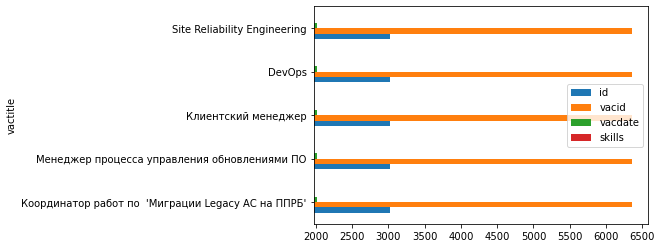

In [157]:
# Постройте график опубликованных вакансий по датам
vacancy.nlargest(5, 'vacid').set_index('vactitle').plot(kind='barh')

In [158]:
vacancy1 = vacancy[['vacid','vactitle']]
vacancy1

,vacid,vactitle
0,1474941,Senior java-разработчик (в команду Онбординга)
1,1476154,Дизайнер мобильных приложений
2,1479834,Старший специалист отдела мониторинга залогово...
3,1484458,Аналитик/разработчик (Программа 'Миграция Leg...
4,1489383,Java разработчик (Команда Functions)
...,...,...
3997,1452160,Руководитель направления (CI/CD)
3998,1465146,Frontend разработчик (продукт Puzzle)
3999,1469858,Инженер дежурной смены
4000,1470061,Главный инженер (системы защиты от DDoS-атак)


<AxesSubplot:ylabel='vactitle'>

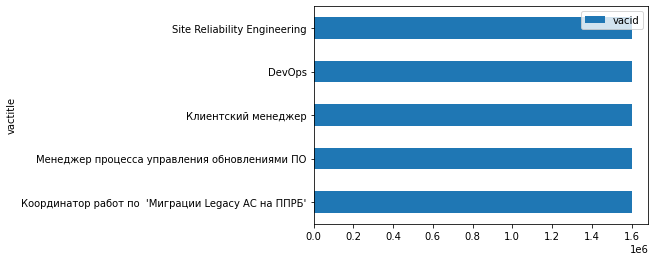

In [159]:
vacancy1.nlargest(5, 'vacid').set_index('vactitle').plot(kind='barh')

In [186]:
# df1.nlargest(5, 'id').set_index('name').plot(kind='barh') ошибка

<AxesSubplot:>

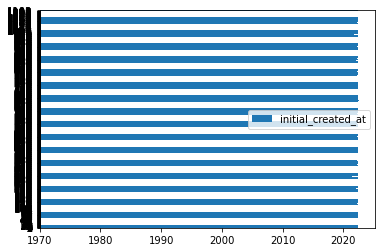

In [167]:
df1.plot(kind='barh')

In [163]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vacancy['day_of_week'] = vacancy.vacdate.dt.day_name()
vacancy

,id,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,skills,day_of_week
0,383479,1474941,Senior java-разработчик (в команду Онбординга),"Работа у нас — это:команда профессионалов, го...",2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,,Monday
1,383480,1476154,Дизайнер мобильных приложений,Мы ищем дизайнера в нашу дружную команду Сбер...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,,Monday
2,383481,1479834,Старший специалист отдела мониторинга залогово...,Условия: ● официальное трудоустройство;● 5-т...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"Многозадачность, Проведение опросов, , Ор...",Monday
3,383482,1484458,Аналитик/разработчик (Программа 'Миграция Leg...,В Блоке Риски стартовала Программа ‘Миграция L...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,,Monday
4,383483,1489383,Java разработчик (Команда Functions),Работа у нас — это:работа в крупнейшем банке ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"Активные продажи, Проведение презентаций, П...",Monday
...,...,...,...,...,...,...,...,...,...
3997,383474,1452160,Руководитель направления (CI/CD),Система статического и динамического анализа и...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN,Monday
3998,383475,1465146,Frontend разработчик (продукт Puzzle),Puzzle – UI аналитика для проведения служебных...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN,Monday
3999,383476,1469858,Инженер дежурной смены,Условия:Работа в крупнейшем Центре киберзащит...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN,Monday
4000,383477,1470061,Главный инженер (системы защиты от DDoS-атак),Продукт Защита периметра (защита от DDos-атак ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN,Monday


In [168]:
df1['day_of_week'] = df1['initial_created_at'].dt.day_name()
df1

C:\Users\150ho\AppData\Local\Temp\ipykernel_13748\2646073980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_week'] = df1['initial_created_at'].dt.day_name()


,id,name,experience,schedule,employment,department,description,key_skills,specializations,professional_roles,published_at,created_at,initial_created_at,day_of_week
0,55415805,Менеджер по работе с клиентами,Нет опыта,Полный день,Полная занятость,Сбер Начало карьеры,Сбер — лучший работодатель России. У нас более...,,Прямые продажи Продажи Оптовая торгов...,Менеджер по продажам менеджер по работе с к...,2022-06-29T13:44:54+0300,2022-06-29T13:44:54+0300,2022-05-16 10:05:41+03:00,Monday
1,55415496,Клиентский менеджер прямых продаж,Нет опыта,Полный день,Полная занятость,Сбер Начало карьеры,Сбер — лучший работодатель России. У нас более...,,Прямые продажи Продажи Оптовая торгов...,Руководитель отдела клиентского обслуживания,2022-06-29T19:44:36+0300,2022-06-29T19:44:36+0300,2022-05-16 10:00:46+03:00,Monday
2,66978838,Специалист по адаптации (onboarding manager),13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,Команда Цифровые поверхности Салют (SberDevice...,"Многозадачность, Проведение опросов, , Ор...",Рекрутмент Управление персоналом тренинг...,Менеджер по персоналу,2022-06-20T09:55:10+0300,2022-06-20T09:55:10+0300,2022-06-20 09:55:10+03:00,Monday
3,67157362,Копирайтер в Управление исследований и инноваций,36 От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,Управление исследований и инноваций координиру...,,Контент Информационные технологии интерн...,Копирайтер редактор корректор,2022-06-24T12:22:12+0300,2022-06-24T12:22:12+0300,2022-06-24 12:22:12+03:00,Friday
4,53361761,Клиентский менеджер малого и микробизнеса,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Клиентский менеджер малого и микробизнеса – ва...,"Активные продажи, Проведение презентаций, П...",Прямые продажи Продажи Оптовая торгов...,Руководитель отдела клиентского обслуживания,2022-06-27T12:47:08+0300,2022-06-27T12:47:08+0300,2022-03-04 10:23:27+03:00,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,66519567,Эксперт сопровождения Hadoop,36 От 3 до 6 лет,Полный день,Полная занятость,Сбер,SberData - департамент по управлению данными в...,,Программирование Разработка Информационн...,Специалист по информационной безопасности,2022-06-26T17:34:26+0300,2022-06-26T17:34:26+0300,2022-06-01 16:17:05+03:00,Wednesday
1100,66640733,Senior разработчик ПО на Golang (SberInfra),36 От 3 до 6 лет,Полный день,Полная занятость,Сбер,Обязанности: Разработка высоконагруженного отк...,,Программирование Разработка Информационн...,Программист разработчик,2022-07-04T09:21:34+0300,2022-07-04T09:21:34+0300,2022-06-06 18:32:24+03:00,Monday
1101,67399016,Менеджер по работе с ключевыми клиентами малог...,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбер — лучший работодатель России. У нас более...,"Прямые продажи, Финансовый анализ, Клиентоо...",Прямые продажи Продажи Оптовая торгов...,Другое,2022-07-04T09:05:17+0300,2022-07-04T09:05:17+0300,2022-07-01 11:13:51+03:00,Friday
1102,67399519,Старший менеджер по привлечению корпоративных ...,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбер — лучший работодатель России. У нас более...,"Холодные продажи, Поиск и привлечение клиент...",Прямые продажи Продажи Оптовая торгов...,Другое,2022-07-04T09:05:16+0300,2022-07-04T09:05:16+0300,2022-07-01 11:18:51+03:00,Friday


In [169]:
# Найдите те вакансии с использованием python, которые вам интересны
s = 'аналитик'.lower()
python_s = 'python'
t1 = vacancy.vactitle.str.lower().str.contains(s)
t2 = vacancy.vacdescription.str.lower().str.contains(python_s)

In [170]:
vacancy.loc[t1]

,id,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,skills,day_of_week
3,383482,1484458,Аналитик/разработчик (Программа 'Миграция Leg...,В Блоке Риски стартовала Программа ‘Миграция L...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,,Monday
10,383489,1525524,Data - аналитик,Новая амбициозная agile-команда по созданию кл...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/15...,,Monday
18,383497,1529113,Системный аналитик. Сервис Автокредитование,Наша команда занимается разработкой сервиса «А...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/15...,,Monday
21,383500,1530279,Аналитик (информационная безопасность),Проект/задачи:Формирование требований для разр...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/15...,"Холодные продажи, Поиск и привлечение клиент...",Monday
29,383508,1545914,Системный аналитик,Чем позиция может быть интересна кандидату. В ...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/15...,,Monday
...,...,...,...,...,...,...,...,...,...
3876,383353,1593504,Аналитик,NaN,2021-03-16,new,https://my.sbertalents.ru/#/job-requisition/15...,NaN,Tuesday
3879,383356,1593526,Системный аналитик (Pega BPM),Компания «Сбербанк» сейчас в поисках специалис...,2021-03-16,new,https://my.sbertalents.ru/#/job-requisition/15...,NaN,Tuesday
3900,383377,1435644,Системный аналитик,"Сбер — больше чем банк, это вселенная полезных...",2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,NaN,Monday
3918,383395,1519655,Старший аналитик по созданию системы принятия ...,Дивизион разрабатывает Интеллектуальную систем...,2021-03-16,new,https://my.sbertalents.ru/#/job-requisition/15...,NaN,Tuesday


In [172]:
# vacancy.loc[t2] нет вакансий

In [174]:
q = 'аналитик'.lower()
python_q = 'python'
t3 = df1.name.str.lower().str.contains(q)
t4 = df1.description.str.lower().str.contains(python_q)

In [176]:
df1.loc[t3]

,id,name,experience,schedule,employment,department,description,key_skills,specializations,professional_roles,published_at,created_at,initial_created_at,day_of_week
17,67353952,Аналитик,Нет опыта,Полный день,Полная занятость,Сбер,Наша команда обеспечивает полноту и доступност...,", Аналитическое мышление, Анализ данных, ...",Другое Продажи Аналитик Информацио...,Аналитик,2022-06-29T22:39:43+0300,2022-06-29T22:39:43+0300,2022-06-29 22:39:43+03:00,Wednesday
23,66853831,Старший кредитный аналитик (малый бизнес),13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Обязанности осуществление анализа операций и ...,"Анализ ФХД, Финансовый анализ, Экономически...",Финансовый анализ Бухгалтерия управленче...,Финансовый аналитик инвестиционный аналитик,2022-06-15T10:45:48+0300,2022-06-15T10:45:48+0300,2022-06-15 10:45:48+03:00,Wednesday
28,67073420,Аналитик данных/ Разработчик отчетности,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Мы создаем централизованное подразделение разм...,,Другое Продажи Аналитик Информацио...,Аналитик,2022-06-22T10:41:27+0300,2022-06-22T10:41:27+0300,2022-06-22 10:41:27+03:00,Wednesday
40,67352254,Финансовый аналитик (СберУниверситет),13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,Обязанности: Бюджетный контроль на участке оп...,"Управленческая отчетность, Финансовая отчетн...",Бюджетирование и планирование Бухгалтери...,Финансовый менеджер,2022-06-29T18:46:27+0300,2022-06-29T18:46:27+0300,2022-06-29 18:46:27+03:00,Wednesday
42,67086669,Бизнес-аналитик,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,"Мы — дивизион Биометрия, создаем и развиваем б...","Работа в команде, , Ориентация на результа...",Другое Продажи Аналитик Информацио...,Аналитик,2022-06-22T14:46:45+0300,2022-06-22T14:46:45+0300,2022-06-22 14:46:45+03:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,66991519,Системный аналитик (Кампании продаж),13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,В команду Кампании продаж ищем системного анал...,", , , Аналитическое мышление, Бизнесанализ",Другое Продажи Аналитик Информацио...,Аналитик,2022-06-20T12:59:42+0300,2022-06-20T12:59:42+0300,2022-06-20 12:59:42+03:00,Monday
1001,67157597,Системный Аналитик,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Ты профессионал с опытом в системном анализе и...,", , , Системный анализ, , , ,",Другое Продажи Аналитик Информацио...,Аналитик,2022-06-24T12:28:04+0300,2022-06-24T12:28:04+0300,2022-06-24 12:28:04+03:00,Friday
1012,54924757,Системный аналитик,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,SberData мы создаем централизованное хранилище...,,Компьютерная безопасность Информационные...,Специалист по информационной безопасности,2022-06-27T09:26:55+0300,2022-06-27T09:26:55+0300,2022-04-19 14:51:13+03:00,Tuesday
1066,66192887,Системный аналитик (Устройства Самообслуживания),13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,Мы – канал Устройств Самообслуживания. Создаем...,", , , Системный анализ,",Другое Продажи Аналитик Информацио...,Аналитик,2022-06-23T18:15:56+0300,2022-06-23T18:15:56+0300,2022-05-30 13:18:28+03:00,Monday


In [177]:
df1.loc[t4]

,id,name,experience,schedule,employment,department,description,key_skills,specializations,professional_roles,published_at,created_at,initial_created_at,day_of_week
28,67073420,Аналитик данных/ Разработчик отчетности,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Мы создаем централизованное подразделение разм...,,Другое Продажи Аналитик Информацио...,Аналитик,2022-06-22T10:41:27+0300,2022-06-22T10:41:27+0300,2022-06-22 10:41:27+03:00,Wednesday
29,67119655,Стажер-разметчик,Нет опыта,Полный день,Стажировка,Сбер для экспертов,Команда Центра искусственного интеллекта Блока...,,Розничная торговля Продажи Прямые про...,Другое,2022-06-23T12:55:00+0300,2022-06-23T12:55:00+0300,2022-06-23 12:55:00+03:00,Thursday
34,67255863,Junior Python разработчик (Цифровой кредитный ...,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,В дивизион Цифровой кредитный мониторинг Корпо...,", , , ,",Программирование Разработка Информационн...,Программист разработчик,2022-06-27T15:24:17+0300,2022-06-27T15:24:17+0300,2022-06-27 15:24:17+03:00,Monday
39,66832293,QA инженер (медицина),Нет опыта,Полный день,Полная занятость,Сбер,О проекте: Ищем специалистов QA в дружную кома...,", , , Функциональное тестирование, Тестир...",Программирование Разработка Информационн...,Тестировщик,2022-06-14T16:26:55+0300,2022-06-14T16:26:55+0300,2022-06-14 16:26:55+03:00,Tuesday
48,66809685,Junior/Middle Data scientist,13 От 1 года до 3 лет,Полный день,Полная занятость,Сбер,В команде кластера &quot;Речевые ассистенты дл...,", , ,",Программирование Разработка Информационн...,Программист разработчик,2022-06-14T10:20:01+0300,2022-06-14T10:20:01+0300,2022-06-14 10:20:01+03:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,67380359,AppSec Engineer Mobile Apps (Android/iOS),36 От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,Мы занимаемся Application Security во всем Сбе...,,Экономическая и информационная безопасность...,Программист разработчик,2022-06-30T16:08:08+0300,2022-06-30T16:08:08+0300,2022-06-30 16:08:08+03:00,Thursday
1098,66833687,DevOps Lead,36 От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,"Мы молодая, амбициозная и дружная команда, раз...",,Программирование Разработка Информационн...,Программист разработчик,2022-06-28T14:48:52+0300,2022-06-28T14:48:52+0300,2022-06-14 16:59:19+03:00,Tuesday
1099,66519567,Эксперт сопровождения Hadoop,36 От 3 до 6 лет,Полный день,Полная занятость,Сбер,SberData - департамент по управлению данными в...,,Программирование Разработка Информационн...,Специалист по информационной безопасности,2022-06-26T17:34:26+0300,2022-06-26T17:34:26+0300,2022-06-01 16:17:05+03:00,Wednesday
1100,66640733,Senior разработчик ПО на Golang (SberInfra),36 От 3 до 6 лет,Полный день,Полная занятость,Сбер,Обязанности: Разработка высоконагруженного отк...,,Программирование Разработка Информационн...,Программист разработчик,2022-07-04T09:21:34+0300,2022-07-04T09:21:34+0300,2022-06-06 18:32:24+03:00,Monday


In [180]:
df1[t3 & t4].shape

(23, 14)

In [179]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий
df1.key_skills.mode()

0    
Name: key_skills, dtype: object

In [201]:
res0 = df1['key_skills'].str.split().value_counts(dropna=False)
res0

[]                                                                                 532
[,, ,, ,, ,]                                                                       198
[,, ,, ,]                                                                           23
[,, ,, ,, ,, ,]                                                                     21
[,, ,]                                                                              16
                                                                                  ... 
[,, ,, ,, Автоматизация, процессов,, ,, ,, ,, ,, ,, ,, ,]                            1
[,, ,, ,, ,, работа, в, офисе,]                                                      1
[Деловая, переписка,, Грамотная, речь,, Деловое, общение,, Ведение, переписки,]      1
[,, ,, ,, Разработка, технических, заданий,]                                         1
[,, ,, ,, ,, ООП,]                                                                   1
Name: key_skills, Length: 249, dtype: int64

In [202]:
df1['key_skills'].value_counts(dropna=False)

                                                                                                                      529
 ,  ,  ,  ,                                                                                                           103
 ,  ,  ,  ,                                                                                                            15
 ,  ,   ,  ,                                                                                                           12
 ,  ,  ,                                                                                                               12
                                                                                                                     ... 
 ,  ,  Дизайн интерфейсов,  Разработка нового продукта,  Навыки презентации                                             1
 ,  ,  ООП,  ,  Системное мышление                                                                                      1
 Регрессионное тестирова

In [200]:
from collections import Counter
res = df1['key_skills'].str.split().apply(pd.value_counts)
res

,"Многозадачность,",Проведение,"опросов,",",",Организация,тренинга,для,новых,"сотрудников,",Разработка,...,"моделирование,",Рискменеджмент,Маркетинговый,заданий,"рисками,",Публичные,"выступления,",База,"Наставничество,",временем
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
res1 = df1['key_skills'].str.split().apply(Counter)
res1

0                                                      {}
1                                                      {}
2       {'Многозадачность,': 1, 'Проведение': 1, 'опро...
3                                                      {}
4       {'Активные': 1, 'продажи,': 1, 'Проведение': 1...
                              ...                        
1099                                                   {}
1100                                                   {}
1101    {'Прямые': 1, 'продажи,': 2, 'Финансовый': 1, ...
1102    {'Холодные': 1, 'продажи,': 2, 'Поиск': 1, 'и'...
1103                                                   {}
Name: key_skills, Length: 1104, dtype: object

In [193]:
res2 = [Counter(x) for x in df1['key_skills'].str.split()]
res2

[Counter(),
 Counter(),
 Counter({'Многозадачность,': 1,
          'Проведение': 1,
          'опросов,': 1,
          ',': 1,
          'Организация': 1,
          'тренинга': 1,
          'для': 1,
          'новых': 1,
          'сотрудников,': 1,
          'Разработка': 1,
          'тестов,': 1,
          'опросников,': 1}),
 Counter(),
 Counter({'Активные': 1,
          'продажи,': 1,
          'Проведение': 1,
          'презентаций,': 1,
          'Привлечение': 1,
          'клиентов,': 1,
          'Навыки': 1,
          'продаж': 1}),
 Counter({'Деловая': 2,
          'переписка,': 1,
          'коммуникация,': 1,
          'Грамотная': 1,
          'речь,': 1,
          'Английский': 1,
          'язык,': 1,
          'Документооборот': 1}),
 Counter(),
 Counter(),
 Counter({'Проведение': 1,
          'презентаций,': 1,
          'Ведение': 1,
          'переговоров,': 1,
          'Организаторские': 1,
          'навыки,': 1,
          'Деловая': 1,
          'коммуникация

In [215]:
counter = Counter()
df2 = df1['key_skills'].str.split().apply(lambda x: counter.update(x))
counter.most_common(10) 

[(',', 1992),
 ('Работа', 42),
 ('Управление', 42),
 ('Английский', 34),
 ('в', 29),
 ('язык,', 28),
 ('проектами,', 28),
 ('с', 25),
 ('ООП,', 23),
 ('анализ,', 22)]

In [218]:
# Постройте график наиболее востребованных навыков для аналитика данных
df3 = df1.loc[t4]
counter = Counter()
df4 = df3['key_skills'].str.split().apply(lambda x: counter.update(x))
m = counter.most_common(10)
m

[(',', 644),
 ('данных,', 11),
 ('тестирование,', 9),
 ('Английский', 8),
 ('Анализ', 7),
 ('язык,', 7),
 ('Управление', 4),
 ('Нагрузочное', 4),
 ('Тестирование', 3),
 ('данных', 3)]

<AxesSubplot:>

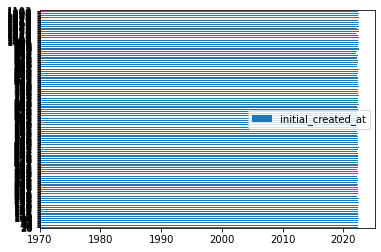

In [224]:
df3.plot(kind='barh') # не пойму